In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 22 12:58:18 2023

@author: cerna
"""

#################################################################################

# PREPROCESSING EEG DATA

#################################################################################

# Import necessary Python modules
from sklearn.decomposition import PCA
from mne_icalabel import label_components
from mne.preprocessing import ICA
import copy  # This is a Python module that allows you to copy objects without changing the original object
from scipy import signal
import sklearn as sk
import matplotlib.pyplot as plt
import os
import matplotlib
import mne
import numpy as np
from scipy.stats import zscore

#matplotlib.use('Qt5Agg')  # or 'TkAgg', depending on your system
# BELOW IS AN EXAMPLE - REPLACE WITH REAL DATA
# Source of adapted code below (reference if needed):
# https://iq.opengenus.org/eeg-signal-analysis-with-python/

Attempting to load file at: ../data/in/TCOA_101_EC.vhdr
Extracting parameters from ../data/in/TCOA_101_EC.vhdr...
Setting channel info structure...
Reading 0 ... 63449  =      0.000 ...    63.449 secs...
['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'Ch9', 'Ch10', 'Ch11', 'Ch12', 'Ch13', 'Ch14', 'Ch15', 'Ch16', 'Ch17', 'Ch18', 'Ch19', 'Ch20', 'Ch21', 'Ch22', 'Ch23', 'Ch24', 'Ch25', 'Ch26', 'Ch27', 'Ch28', 'Ch29', 'Ch30', 'Ch31', 'Ch32', 'Ch33', 'Ch34', 'Ch35', 'Ch36', 'Ch37', 'Ch38', 'Ch39', 'Ch40', 'Ch41', 'Ch42', 'Ch43', 'Ch44', 'Ch45', 'Ch46', 'Ch47', 'Ch48', 'Ch49', 'Ch50', 'Ch51', 'Ch52', 'Ch53', 'Ch54', 'Ch55', 'Ch56', 'Ch57', 'Ch58', 'Ch59', 'Ch60', 'Ch61', 'Ch62', 'Ch63', 'Ch64', 'Aux1', 'Aux2', 'Aux3', 'Aux4', 'Aux5', 'Aux6', 'Aux7', 'Aux8']
Using matplotlib as 2D backend.


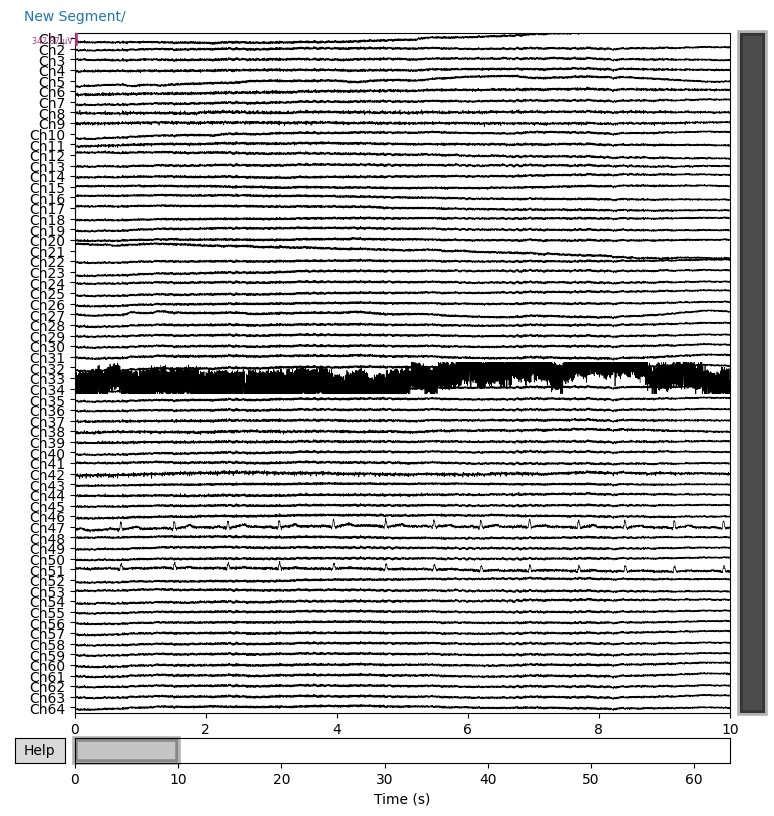

<Info | 7 non-empty values
 bads: []
 ch_names: Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8, Ch9, Ch10, Ch11, Ch12, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2021-09-12 12:38:19 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


In [2]:
#################################################################################

# Define the path to your EEG data
subj_data_path = '../data/in'  # replace with your directory where you saved EEG data
fname = 'TCOA_101_EC'  # --> replace file name here
subj = '101'  # --> replace participant ID here
file_path = os.path.join(subj_data_path, fname + '.vhdr')

# Print the file path to check if it's correct
print(f'Attempting to load file at: {file_path}')

# Load data
EEG = mne.io.read_raw_brainvision(file_path, preload=True)

# Check the number of channels in your EEG data by examining the structure
print(EEG.ch_names)

# Drop last 8 channels (Aux channels)
channels_to_drop = EEG.ch_names[-8:]
EEG.drop_channels(channels_to_drop)

# Plot the data to visualize waveforms (all remaining channels)
EEG.plot(n_channels=len(EEG.ch_names), scalings='auto')

# Checking data attributes to make sure we have the right number of channels
print(EEG.info)



Updated location of FPz: [0.00178745 0.10434753 0.00833357]
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 s)



/tmp/ipykernel_32695/4232343081.py:26: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  EEG.set_montage(montage, on_missing='warn')
/tmp/ipykernel_32695/4232343081.py:26: RuntimeWarning: DigMontage is only a subset of info. There is 1 channel position not present in the DigMontage. The channel missing from the montage is:

['Rmastoid'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if this is not an EEG channel, or use the on_missing parameter if the channel position is allowed to be unknown in your analyses.
  EEG.set_montage(montage, on_missing='warn')
/tmp/ipykernel_32695/4232343081.py:57: RuntimeWarning: The unit for channel(s) Rmastoid has changed from V to NA.
  EEG.set_channel_types(channel_types)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: 

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.2s finished


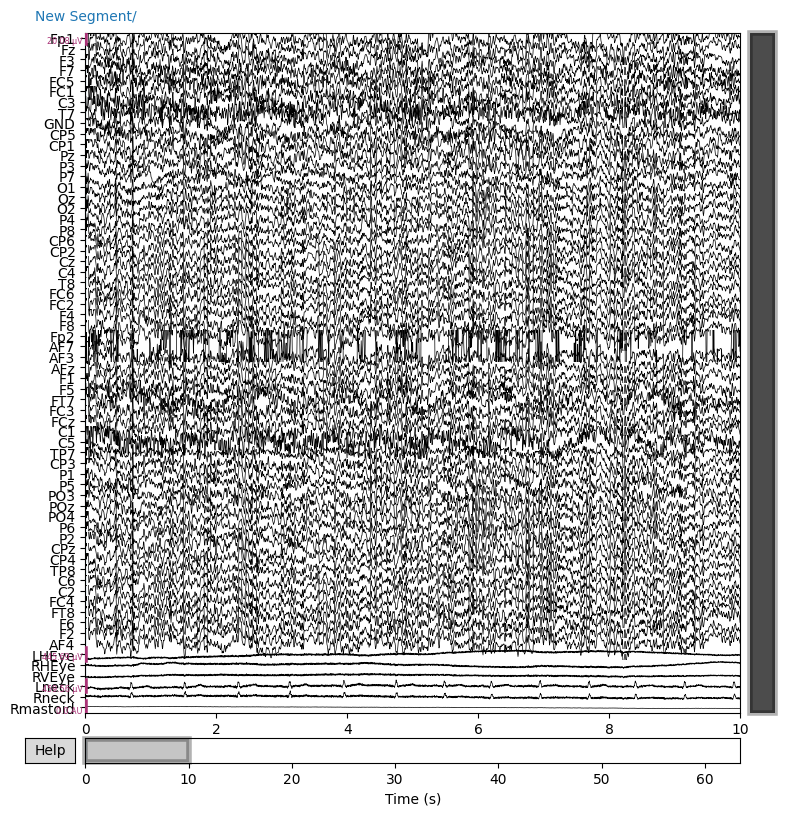

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Overwriting existing file.
Writing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_maprenamed&nfiltered.fif


/home/prakhar/.local/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/tmp/ipykernel_32695/4232343081.py:81: RuntimeWarning: This filename (/home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_maprenamed&nfiltered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  EEG.save(preprocessed_file, overwrite=True)


Closing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_maprenamed&nfiltered.fif
[done]


In [3]:
#################################################################################

# Read the custom montage
montage_path = r"../data/in/MFPRL_UPDATED_V2.sfp"
montage = mne.channels.read_custom_montage(montage_path)

# Define the map of channel names using the provided keys
ch_map = {'Ch1': 'Fp1', 'Ch2': 'Fz', 'Ch3': 'F3', 'Ch4': 'F7', 'Ch5': 'LHEye', 'Ch6': 'FC5',
          # Setting FPz as GND so it matches montage
          'Ch7': 'FC1', 'Ch8': 'C3', 'Ch9': 'T7', 'Ch10': 'GND', 'Ch11': 'CP5', 'Ch12': 'CP1',
          'Ch13': 'Pz', 'Ch14': 'P3', 'Ch15': 'P7', 'Ch16': 'O1', 'Ch17': 'Oz', 'Ch18': 'O2',
          'Ch19': 'P4', 'Ch20': 'P8', 'Ch21': 'Rmastoid', 'Ch22': 'CP6', 'Ch23': 'CP2', 'Ch24': 'Cz',
          'Ch25': 'C4', 'Ch26': 'T8', 'Ch27': 'RHEye', 'Ch28': 'FC6', 'Ch29': 'FC2', 'Ch30': 'F4',
          'Ch31': 'F8', 'Ch32': 'Fp2', 'Ch33': 'AF7', 'Ch34': 'AF3', 'Ch35': 'AFz', 'Ch36': 'F1',
          'Ch37': 'F5', 'Ch38': 'FT7', 'Ch39': 'FC3', 'Ch40': 'FCz', 'Ch41': 'C1', 'Ch42': 'C5',
          'Ch43': 'TP7', 'Ch44': 'CP3', 'Ch45': 'P1', 'Ch46': 'P5', 'Ch47': 'Lneck', 'Ch48': 'PO3',
          'Ch49': 'POz', 'Ch50': 'PO4', 'Ch51': 'Rneck', 'Ch52': 'P6', 'Ch53': 'P2', 'Ch54': 'CPz',
          'Ch55': 'CP4', 'Ch56': 'TP8', 'Ch57': 'C6', 'Ch58': 'C2', 'Ch59': 'FC4', 'Ch60': 'FT8',
          'Ch61': 'F6', 'Ch62': 'F2', 'Ch63': 'AF4', 'Ch64': 'RVEye'}


# Rename the channels using the new ch_map
EEG.rename_channels(ch_map)

# Now the channels should match the names in the montage
EEG.set_montage(montage, on_missing='warn')

# Create a dictionary for channel types
channel_types = {}

# Set all channels to 'eeg' by default
for ch in ch_map.values():
    channel_types[ch] = 'eeg'

# Update the dictionary with the special channel types
channel_types['RVEye'] = 'eog'
channel_types['LHEye'] = 'eog'
channel_types['RHEye'] = 'eog'
channel_types['Rneck'] = 'emg'
channel_types['Lneck'] = 'emg'
channel_types['Rmastoid'] = 'misc'

# Retrieve the locations of FP1 and FP2
fp1_loc = EEG.info['chs'][EEG.ch_names.index('Fp1')]['loc'][:3]
fp2_loc = EEG.info['chs'][EEG.ch_names.index('Fp2')]['loc'][:3]

# Compute the average location for FPz
fpz_loc = (fp1_loc + fp2_loc) / 2

# Update the location of FPz in the original_EEG object
EEG.info['chs'][EEG.ch_names.index('GND')]['loc'][:3] = fpz_loc

# Print the updated location of FPz to verify
print(f"Updated location of FPz: {fpz_loc}")

# Set the channel types in the EEG data
EEG.set_channel_types(channel_types)

# Apply a low-pass filter with a cutoff of 50 Hz
EEG.filter(l_freq=None, h_freq=50)

# Apply a high-pass filter with a cutoff of 1 Hz
EEG.filter(l_freq=1, h_freq=None)

# Add a notch filter from 60 Hz
# This will create an array [60, 120, 180, 240] to capture the harmonics
freqs = np.arange(60, 241, 60)
EEG.notch_filter(freqs)

# Plot the data to visualize waveforms after filtering
EEG.plot(n_channels=len(EEG.ch_names), scalings='auto')

# Plotting EEG signal via PSD to check if the notch filter removed the power line noise
EEG.plot_psd()

# Save the filtered data
# Replace with your desired output directory
output_dir = r'../data/out'
preprocessed_file = os.path.join(
    output_dir, subj + '_maprenamed&nfiltered.fif')
EEG.save(preprocessed_file, overwrite=True)



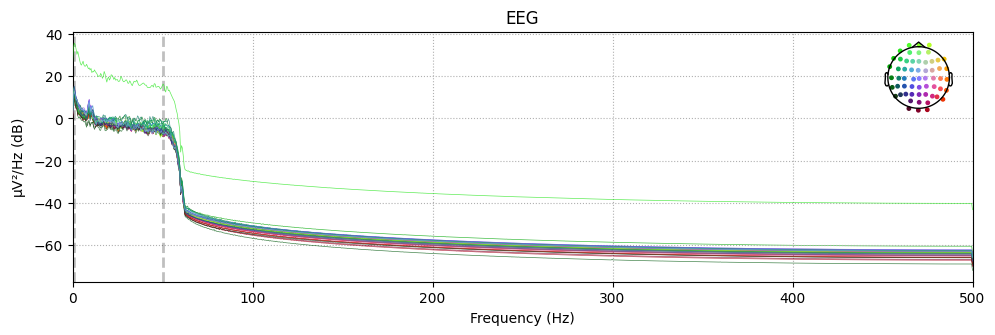

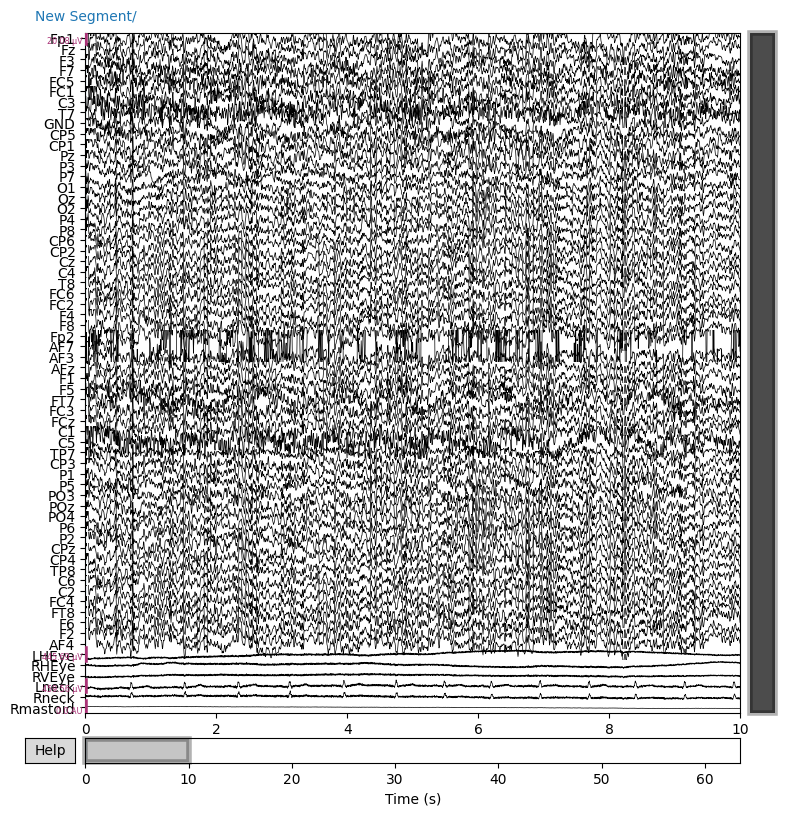

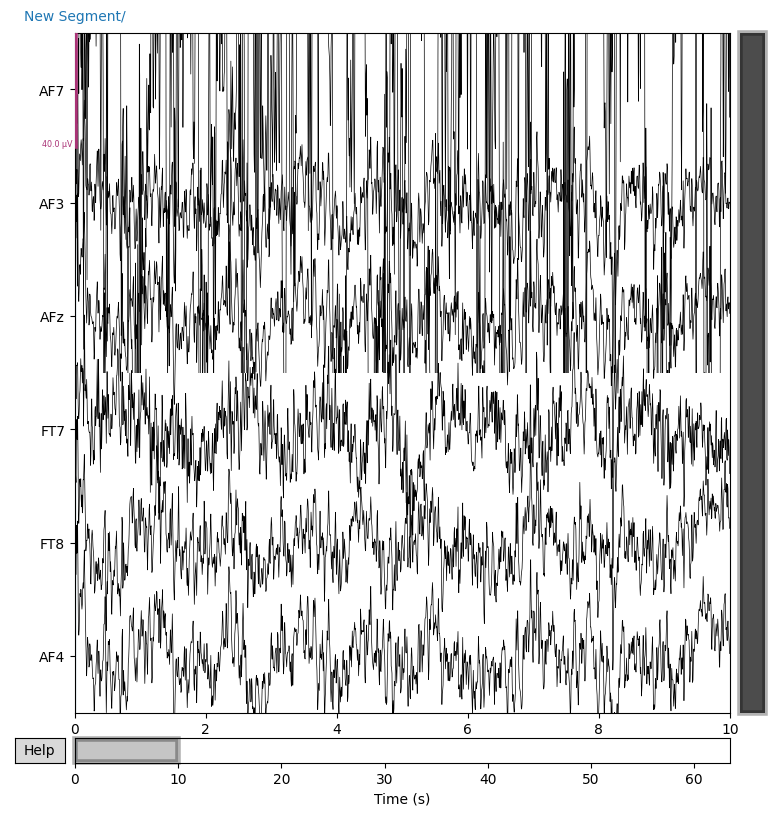

['AF7']
['AF7']
Overwriting existing file.
Writing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_badchannels.fif
Closing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_badchannels.fif
[done]


/tmp/ipykernel_32695/1300129600.py:30: RuntimeWarning: This filename (/home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_badchannels.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  EEG.save(preprocessed_file, overwrite=True)


In [4]:
#################################################################################

# MARKING BAD CHANNELS


# Visualize all channels to identify bad channels
EEG.plot(n_channels=len(EEG.ch_names), scalings='auto')

# This can be used to plot the data with the bad channels marked.
# Uncomment the two lines of code below to see the plot
# Replace 'regexp=" ."' with the tentative bad channels
picks = mne.pick_channels_regexp(EEG.ch_names, regexp="AF.|FT.")
EEG.plot(order=picks, n_channels=len(picks))

# Change list of bad channels
original_bads = copy.deepcopy(EEG.info["bads"])
EEG.info["bads"].append("AF7")  # add a single channel
original_bads.append("AF7")  # add a single channel to the original_bads list
# EEG_csd.info["bads"].extend(["EEG 051", "EEG 052"])  # add a list of channels
# original_bads["bads"].extend(["EEG 051", "EEG 052"])  # add a list of channels

# Print the bad channels to double check
print(EEG.info['bads'])
print(original_bads)

# Save the data with the bad channels marked
# Replace with your desired output directory
output_dir = r'../data/out'
preprocessed_file = os.path.join(output_dir, subj + '_badchannels.fif')
EEG.save(preprocessed_file, overwrite=True)



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


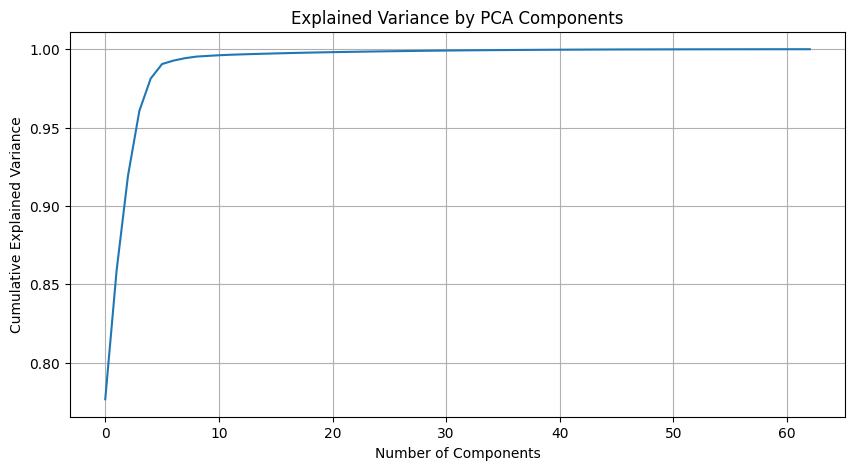

Fitting ICA to data using 57 channels (please be patient, this may take a while)
Selecting by explained variance: 44 components
Computing Extended Infomax ICA
Fitting ICA took 15.5s.
Creating RawArray with float64 data, n_channels=47, n_times=63450
    Range : 0 ... 63449 =      0.000 ...    63.449 secs
Ready.


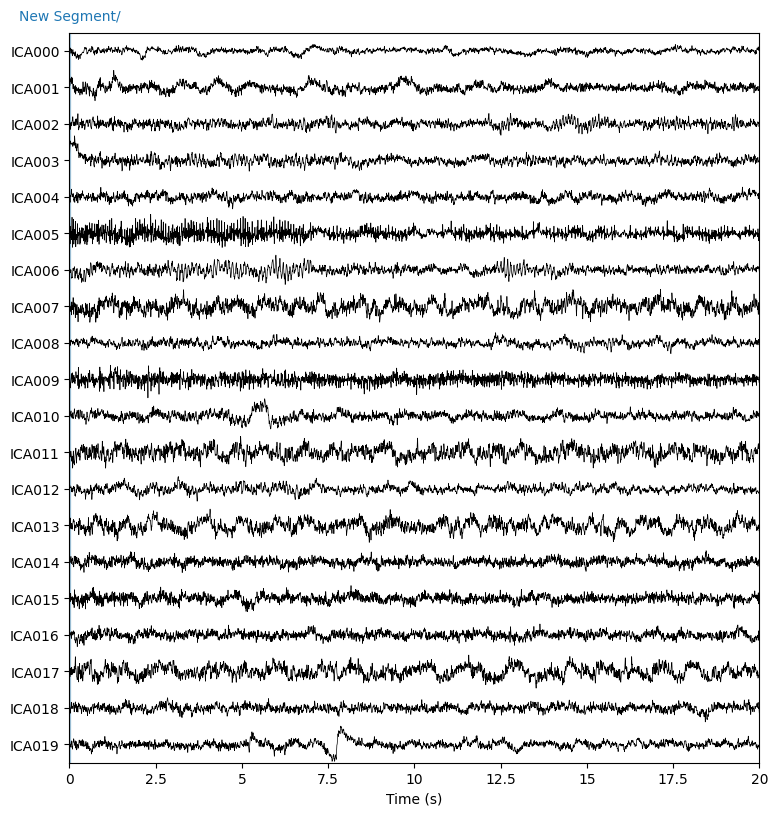

Plotting the ICA components as topographies...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_32695/3372216312.py:58: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(original_EEG, ica, method="iclabel")


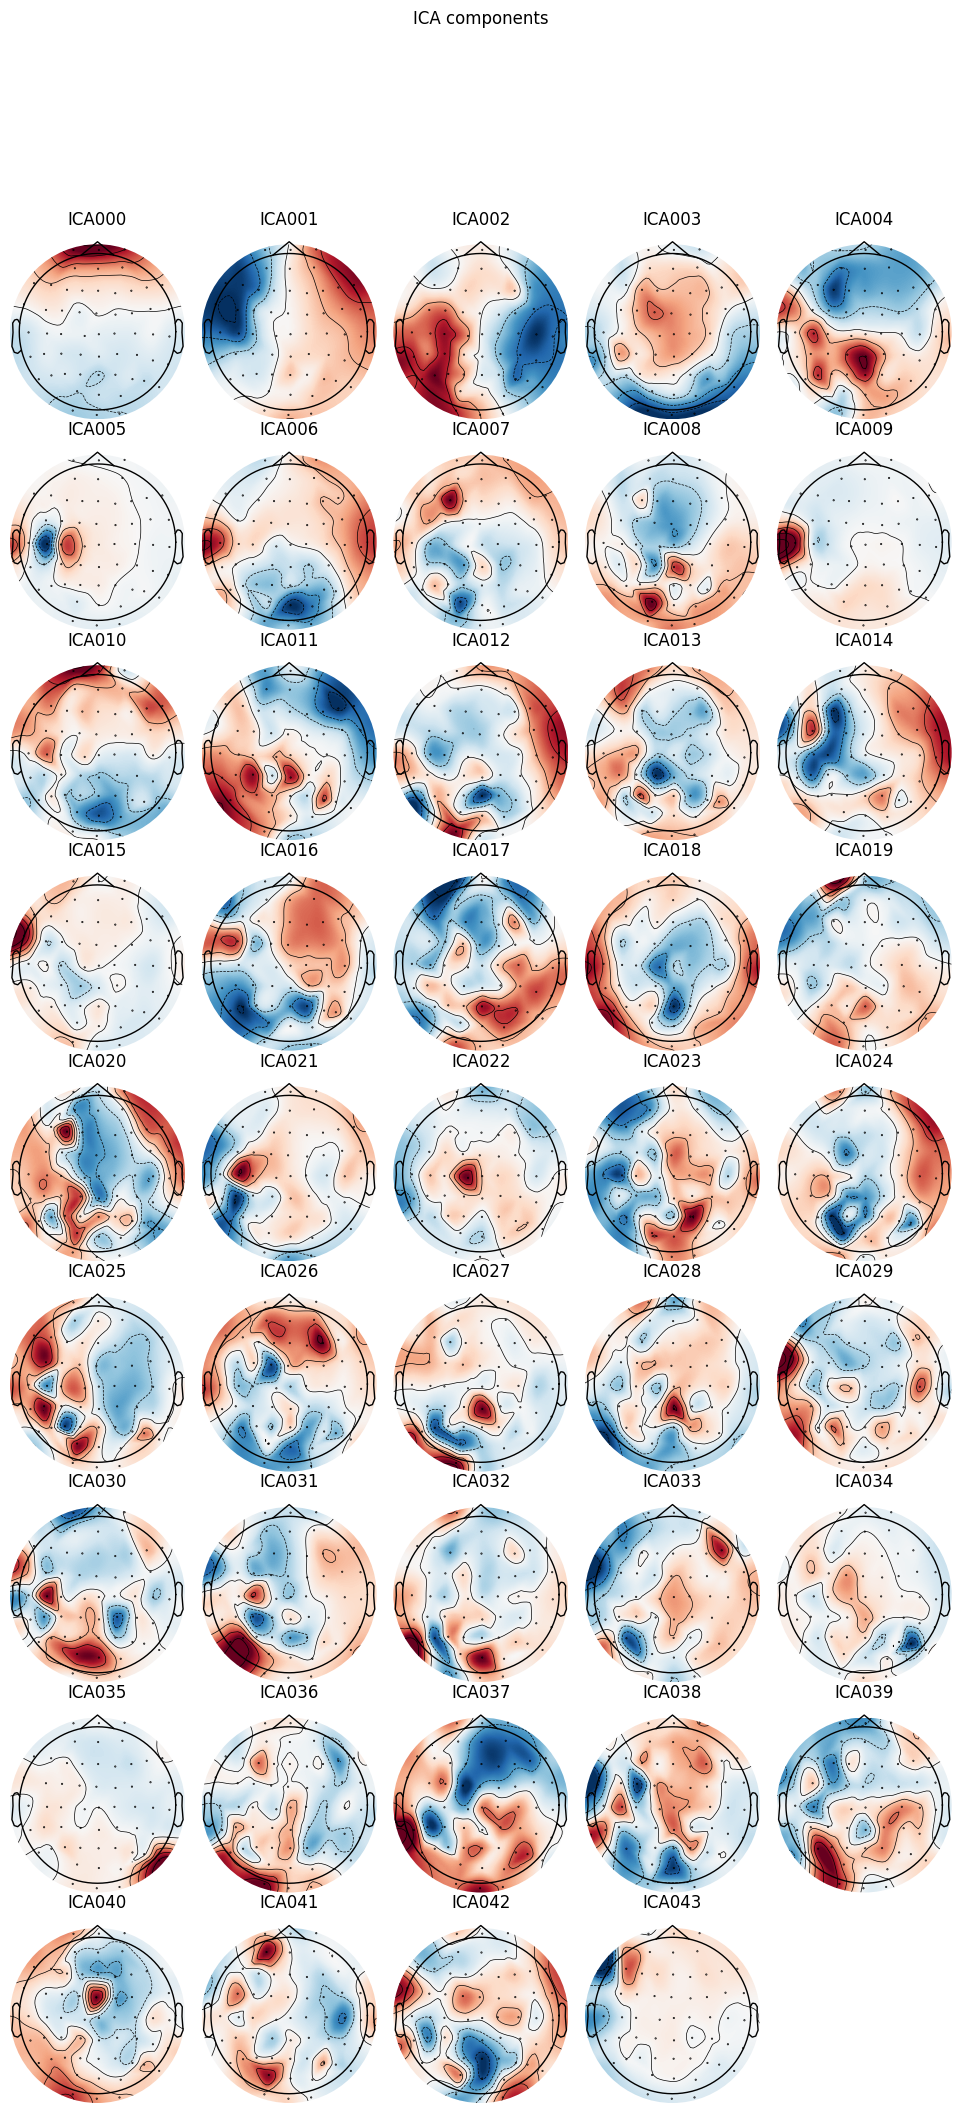

Applying ICA to Raw instance
    Transforming to ICA space (44 components)
    Zeroing out 1 ICA component
    Projecting back using 57 PCA components


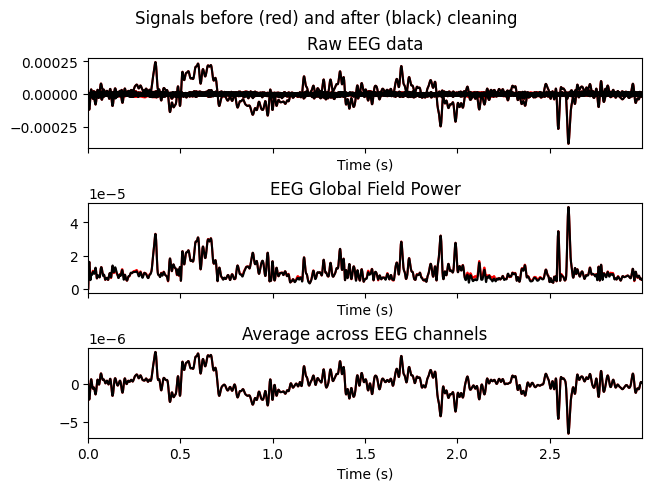


Initial labels:
Component 0: eye blink
Component 1: eye blink
Component 2: brain
Component 3: brain
Component 4: brain
Component 5: other
Component 6: brain
Component 7: other
Component 8: other
Component 9: muscle artifact
Component 10: other
Component 11: other
Component 12: brain
Component 13: other
Component 14: other
Component 15: other
Component 16: other
Component 17: other
Component 18: other
Component 19: other
Component 20: other
Component 21: brain
Component 22: brain
Component 23: other
Component 24: other
Component 25: other
Component 26: other
Component 27: other
Component 28: other
Component 29: other
Component 30: other
Component 31: other
Component 32: other
Component 33: other
Component 34: other
Component 35: other
Component 36: other
Component 37: other
Component 38: other
Component 39: other
Component 40: other
Component 41: other
Component 42: other
Component 43: muscle artifact

Final labels:
Component 0: eye blink
Component 1: eye blink
Component 2: brain
Compo

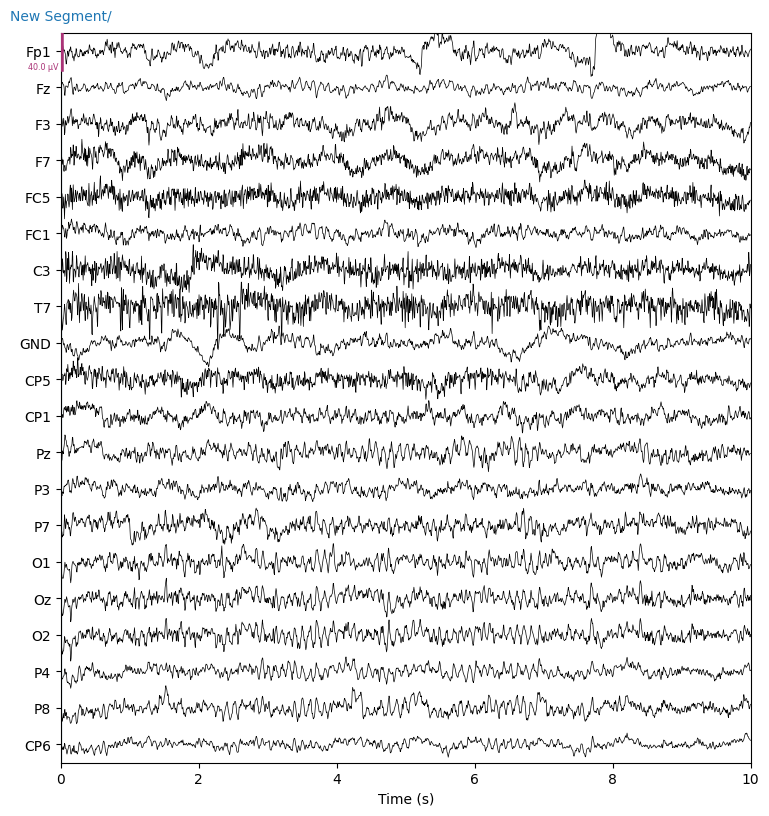

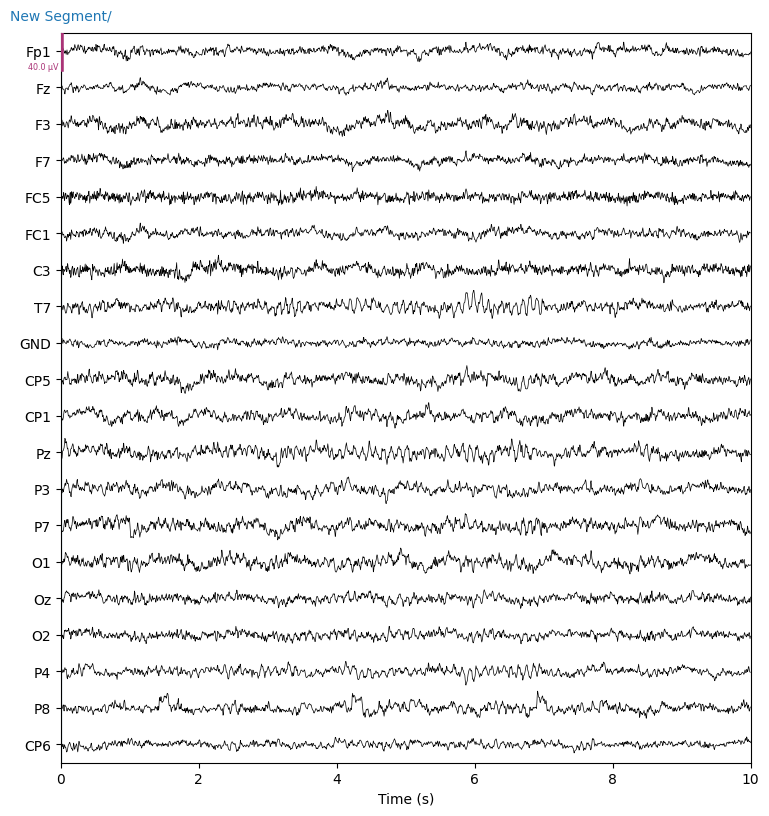

Overwriting existing file.
Writing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_ICA.fif
Closing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_ICA.fif


/tmp/ipykernel_32695/3372216312.py:122: RuntimeWarning: This filename (/home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_ICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_EEG.save(preprocessed_file, overwrite=True)


[done]


In [5]:
############################# -ONLY RUN NEXT STEP IF BAD CHANNELS ARE FOUND TO INTERPOLATE-#############################

# ICA (Independent Component Analysis)

# Import necessary Python modules

# Keep a reference to the original, uncropped data
original_EEG = EEG

# Crop a copy of the data to three seconds for easier plotting
cropped_EEG = EEG.copy().crop(tmin=0, tmax=3).load_data()

# Fit average re-reference to the data
original_EEG.set_eeg_reference('average')

# Drop channels #10 and #21 (mastoids) before ICA
original_EEG.drop_channels(['Rmastoid'])

# Determine the number of PCA components
data = original_EEG.get_data().T
pca = PCA()
pca.fit(data)

# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Define ICA parameters
n_components = 0.99  # Choose number of ICA components based on PCA
ica = ICA(
    n_components=n_components,
    max_iter="auto",
    method="infomax",
    random_state=97,
    fit_params=dict(extended=True),
)

# Pick only EEG channels
picks_eeg = mne.pick_types(original_EEG.info, meg=False,
                           eeg=True, eog=False, stim=False, emg=False, exclude='bads')

# Fit ICA using only EEG channels
ica.fit(original_EEG, picks=picks_eeg, decim=3)

# Plot the ICA components as time series
ica.plot_sources(original_EEG, show_scrollbars=False, show=True)

# Plot the ICA components as topographies in multiple windows
print("Plotting the ICA components as topographies...")
n_components_actual = ica.n_components_

# Selecting ICA components automatically using ICLabel
ic_labels = label_components(original_EEG, ica, method="iclabel")
component_labels = ic_labels["labels"]  # Extract the labels
# Extract the probabilities
component_probabilities = ic_labels["y_pred_proba"]
for i in range(0, n_components_actual, 62):
    # Plot the components
    fig = ica.plot_components(picks=range(
        i, min(i + 62, n_components_actual)), ch_type='eeg', inst=original_EEG)
    # Set titles for each axis based on the labels and probabilities
    for ax, label, prob in zip(fig.axes, component_labels[i:min(i + 62, n_components_actual)],
                               component_probabilities[i:min(i + 62, n_components_actual)]):
        # Displaying label and probability rounded to 2 decimal places
        ax.set_title(f"{label} ({prob:.2f})")
    # blinks
    ica.plot_overlay(original_EEG, exclude=[0], picks="eeg")

# ICLabel scores
print("\nInitial labels:")
for idx, label in enumerate(component_labels):
    print(f"Component {idx}: {label}")

# Modify labels based on user input
while True:
    modify = input(
        "\nDo you want to modify any label? (yes/no): ").strip().lower()
    if modify == 'yes':
        component_nums = input(
            "Enter the component numbers you want to modify (comma-separated): ").split(',')
        new_labels = input(
            "Enter the new labels for these components (comma-separated): ").split(',')

        for comp_num, new_label in zip(component_nums, new_labels):
            component_labels[int(comp_num.strip())] = new_label.strip()
    else:
        break

print("\nFinal labels:")
for idx, label in enumerate(component_labels):
    print(f"Component {idx}: {label}")

# Extract labels and reconstruct raw data
labels = ic_labels["labels"]
probabilities = ic_labels["y_pred_proba"]

# Exclude components based on label and probability
exclude_idx = [idx for idx, (label, prob) in enumerate(zip(labels, probabilities))
               if label not in ["brain", "other"] or prob < 0.70]
print(f"Excluding these ICA components: {exclude_idx}")

# Copy the original interpolated EEG data
reconst_EEG = original_EEG.copy()

# Apply the ICA transformation, excluding certain components
ica.apply(reconst_EEG, exclude=exclude_idx)

# Plot the original data and set the window title
fig = original_EEG.plot(show_scrollbars=False)

# Plot the reconstructed data and set the window title
fig = reconst_EEG.plot(show_scrollbars=False)

# Save the preprocessed data
output_dir = r'../data/out'
preprocessed_file = os.path.join(output_dir, subj + '_ICA.fif')
reconst_EEG.save(preprocessed_file, overwrite=True)



Creating RawArray with float64 data, n_channels=63, n_times=63450
    Range : 0 ... 63449 =      0.000 ...    63.449 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=3001
    Range : 0 ... 3000 =      0.000 ...     3.000 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 98.3 mm
Computing interpolation matrix from 62 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels


/tmp/ipykernel_32695/1372662166.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  original_EEG.set_montage(mne.channels.make_dig_montage(
/tmp/ipykernel_32695/1372662166.py:26: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  cropped_EEG.set_montage(mne.channels.make_dig_montage(


    Automatic origin fit: head of radius 91.5 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors


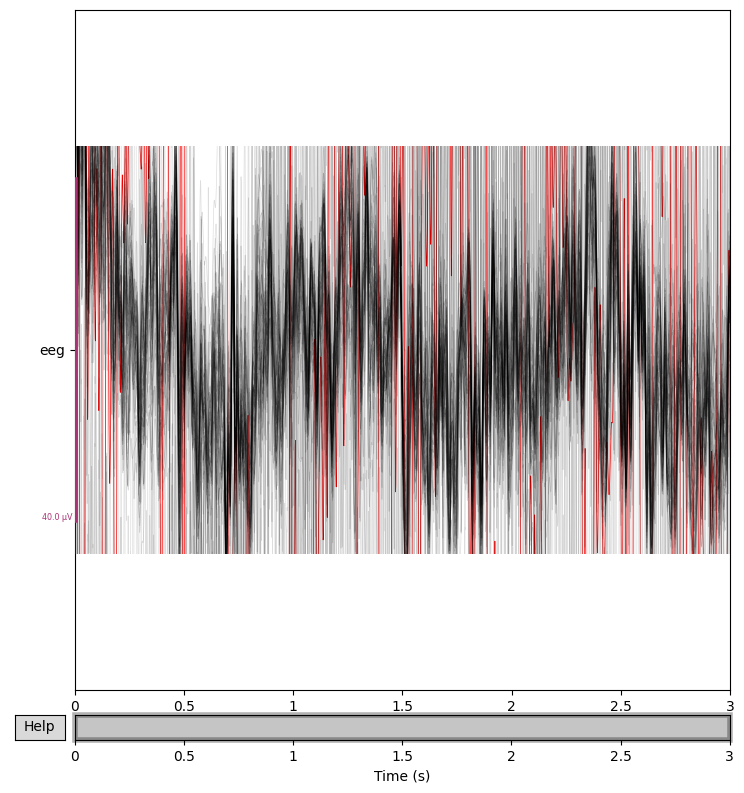

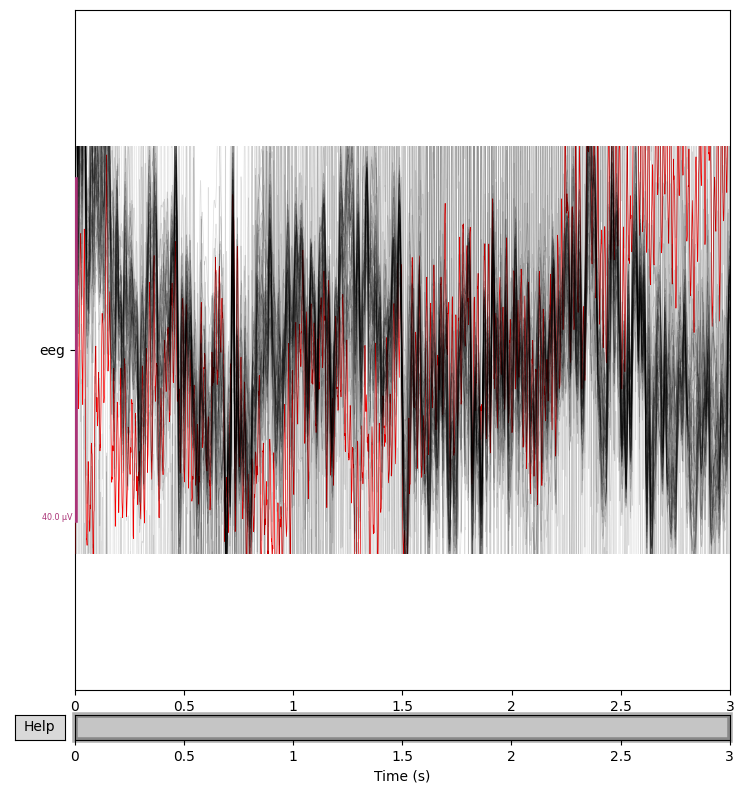

Overwriting existing file.
Writing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_interpolated.fif
Closing /home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_interpolated.fif
[done]
Used Annotations descriptions: ['Event']
Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 64 events and 1001 original time points ...
2 bad epochs dropped


/tmp/ipykernel_32695/1372662166.py:49: RuntimeWarning: This filename (/home/prakhar/code/uiuc/mfprl/neuroconn/src/../data/out/101_interpolated.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  original_EEG_data_interp.save(preprocessed_file, overwrite=True)


Dropped 4 epochs: 2, 28, 31, 50


/tmp/ipykernel_32695/1372662166.py:116: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs_all.plot()


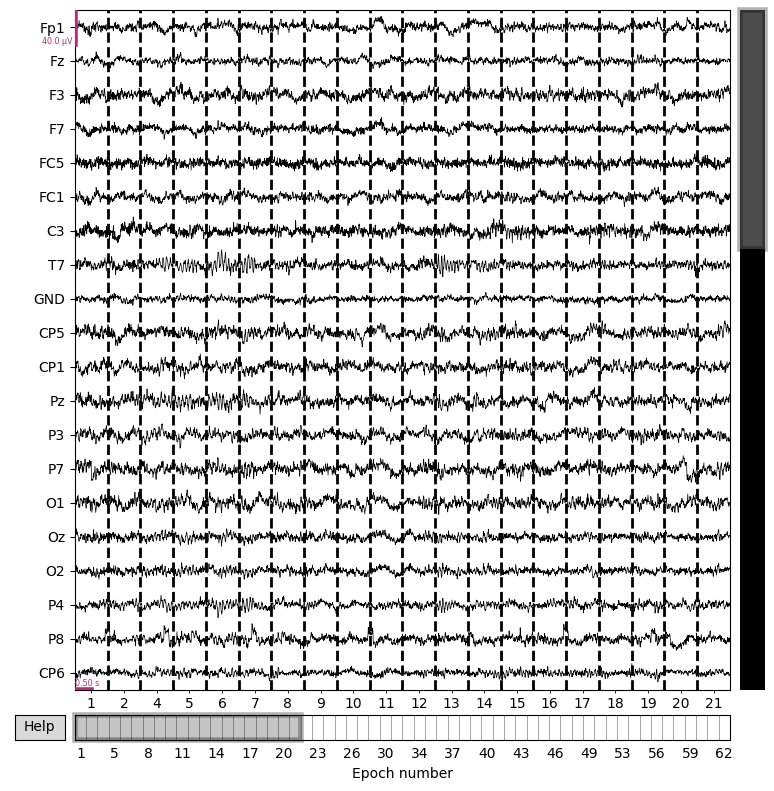

Overwriting existing file.


/tmp/ipykernel_32695/1372662166.py:122: RuntimeWarning: This filename (../data/out/101_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_all.save(preprocessed_file, overwrite=True)


In [6]:
#################################################################################

# Interpolate bad channels

# Replace NaN or inf values in channel locations with zero
new_chs = original_EEG.info['chs'].copy()
for ch in new_chs:
    ch['loc'] = np.nan_to_num(ch['loc'], nan=0.0, posinf=0.0, neginf=0.0)

new_info = mne.create_info(
    [ch['ch_name'] for ch in new_chs], original_EEG.info['sfreq'], ch_types='eeg')
original_EEG = mne.io.RawArray(original_EEG.get_data(), new_info)
original_EEG.set_montage(mne.channels.make_dig_montage(
    ch_pos={ch['ch_name']: ch['loc'][:3] for ch in new_chs}))
# Set the bad channels back to the original list
original_EEG.info['bads'] = original_bads

# Repeat for cropped_EEG
new_chs = cropped_EEG.info['chs'].copy()
for ch in new_chs:
    ch['loc'] = np.nan_to_num(ch['loc'], nan=0.0, posinf=0.0, neginf=0.0)

new_info = mne.create_info(
    [ch['ch_name'] for ch in new_chs], cropped_EEG.info['sfreq'], ch_types='eeg')
cropped_EEG = mne.io.RawArray(cropped_EEG.get_data(), new_info)
cropped_EEG.set_montage(mne.channels.make_dig_montage(
    ch_pos={ch['ch_name']: ch['loc'][:3] for ch in new_chs}))
# Set the bad channels back to the original list
cropped_EEG.info['bads'] = original_bads

# Pick types and interpolate bads
original_EEG_data = original_EEG.copy().pick_types(
    meg=False, eeg=True, exclude=[])
original_EEG_data_interp = original_EEG_data.copy().interpolate_bads(reset_bads=False)

cropped_EEG_data = cropped_EEG.copy().pick_types(meg=False, eeg=True, exclude=[])
cropped_EEG_data_interp = cropped_EEG_data.copy().interpolate_bads(reset_bads=False)

# Plot the data before and after interpolation
for title, data in zip(["cropped orig.", "cropped interp."], [cropped_EEG_data, cropped_EEG_data_interp]):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = data.plot(butterfly=True, color="#00000022", bad_color="r")
    fig.subplots_adjust(top=0.9)
    fig.suptitle(title, size="xx-large", weight="bold")

# Save the interpolated data
output_dir = r'../data/out'
preprocessed_file = os.path.join(output_dir, subj + '_interpolated.fif')
original_EEG_data_interp.save(preprocessed_file, overwrite=True)

#################################################################################

# EPOCHING

# Define epoch parameters
name = subj + '_eventchan'  # --> change for each condition
# Latency rate/Sampling rate
epoch_no = np.floor(reconst_EEG.get_data(
).shape[1] / reconst_EEG.info['sfreq'])

# Create a list of onset times for your events
onsets = np.arange(0, reconst_EEG.get_data(
).shape[1] / reconst_EEG.info['sfreq'], 1)

# Create a list of event durations (all zeros if the events are instantaneous)
durations = np.zeros_like(onsets)

# Create a list of event descriptions
descriptions = ['Event'] * len(onsets)

# Create an Annotations object
annotations = mne.Annotations(onsets, durations, descriptions)

# Add the annotations to the Raw object
reconst_EEG.set_annotations(annotations)

# Now you can extract the events from the annotations
events, event_id = mne.events_from_annotations(reconst_EEG)

# Define epoching parameters
name = subj + '_epoch'  # --> change the name of condition
codes = ['1']
tmin = -0.5  # Start of the epoch (in seconds)
tmax = 0.5  # End of the epoch (in seconds)

# Create epochs without rejection to keep all data
epochs_all = mne.Epochs(reconst_EEG, events, event_id=event_id,
                        tmin=tmin, tmax=tmax, proj=True, baseline=None, preload=True)

# Apply z-score normalization and keep track of which epochs exceed the threshold
zscore_threshold = 6
to_drop = []

temp_data = np.zeros_like(epochs_all._data)

for i in range(len(epochs_all)):
    temp_data[i] = zscore(epochs_all._data[i], axis=1)
    if np.any(np.abs(temp_data[i]) > zscore_threshold):
        to_drop.append(i)

# Now we can drop the epochs that exceeded the threshold
epochs_all.drop(to_drop)

# Resample and decimate the epochs
current_sfreq = epochs_all.info['sfreq']
# Hz chaging this according to  https://doi.org/10.1046/j.1440-1819.2000.00729.x
desired_sfreq = 512

# Apply the resampling
epochs_all.resample(desired_sfreq, npad='auto')

# Get the data from all epochs
data_all = epochs_all.get_data()

# Plot the data
epochs_all.plot()

# Save the filtered data
# Replace with your desired output directory
output_dir = r'../data/out'
preprocessed_file = os.path.join(output_dir, subj + '_epoched.fif')
epochs_all.save(preprocessed_file, overwrite=True)
